# Python lab #2A

### Iris dataset exercise

Import all necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.model_selection import train_test_split

Download the dataset

First way: download via URL

In [2]:
! curl https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data -o ./Datasets/iris.data

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  4551  100  4551    0     0   4221      0  0:00:01  0:00:01 --:--:--  4225


Second way: download via Scikit-learn

In [3]:
# from sklearn import datasets
# iris = datasets.load_iris()

Read the file with pandas

In [4]:
iris_data = pd.read_csv('./Datasets/iris.data', header=None, sep=',')
iris_data.columns = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'species']

Display the 12 first lines and the 12 last lines

In [5]:
iris_data.head(12)

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
iris_data.tail(12)

,sepal_l,sepal_w,petal_l,petal_w,species
138,6.0,3.0,4.8,1.8,Iris-virginica
139,6.9,3.1,5.4,2.1,Iris-virginica
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica


Display informations about the dataset

In [7]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sepal_l  150 non-null    float64
 1   sepal_w  150 non-null    float64
 2   petal_l  150 non-null    float64
 3   petal_w  150 non-null    float64
 4   species  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
iris_data.describe()

,sepal_l,sepal_w,petal_l,petal_w
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Give the number of species

In [9]:
iris_data['species'].nunique()

3

List the different species

In [10]:
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Give the number of observations per category

In [11]:
iris_data['species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64

Check the length of each category

In [12]:
print(len(iris_data[iris_data['species'] == 'Iris-versicolor']))
print(len(iris_data[iris_data['species'] == 'Iris-virginica']))
print(len(iris_data[iris_data['species'] == 'Iris-setosa']))

50
50
50


Divide the original dataset into three subsets (one by specie)

In [13]:
iris_versicolor = iris_data[iris_data["species"] == "Iris-versicolor"]
iris_versicolor.head()

,sepal_l,sepal_w,petal_l,petal_w,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor


In [14]:
iris_virginica = iris_data[iris_data["species"] == "Iris-virginica"]
iris_virginica.head()

,sepal_l,sepal_w,petal_l,petal_w,species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica


In [15]:
iris_setosa = iris_data[iris_data["species"] == "Iris-setosa"]
iris_setosa.head()

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Save the subsets to disk as csv files

In [16]:
def csv_func(arr_df, arr_filenames):
    for idx, dataframe in enumerate(arr_df):
        dataframe.to_csv('./Datasets/%s' % arr_filenames[idx])

In [17]:
array_dataframes = [iris_versicolor, iris_virginica, iris_setosa]
array_filenames = ['versicolor.csv', 'virginica.csv', 'setosa.csv']

In [18]:
csv_func(array_dataframes, array_filenames)

Check is the previously created files exist

In [19]:
def check_files(array_of_files):
    for file in array_of_files:
        if os.path.exists('./Datasets/%s' % file):
            print("File %s exists" % file)
        else:
            print("File %s does not exist" % file)

check_files(array_filenames)

File versicolor.csv exists
File virginica.csv exists
File setosa.csv exists


Read the previously created files

In [20]:
def read_files(arr_files, separator=',', concat_axis=0):
    data_f = []
    for file in arr_files:
        data_f.append(pd.read_csv('./Datasets/%s' % file, sep=separator, index_col=0))
    res = pd.concat(data_f, axis=concat_axis).reset_index(drop=True)
    return res

df_iris_from_disk = read_files(array_filenames)

In [21]:
# Zip
#ex1 = ["Iris-", "Iris-", "Iris-"]
#ex2 = ["setosa", "versicolor", "virginica"]
#my_list = list(zip(ex1, ex2))
#print(my_list)

#for element in my_list:
    #print(element)

Plot data

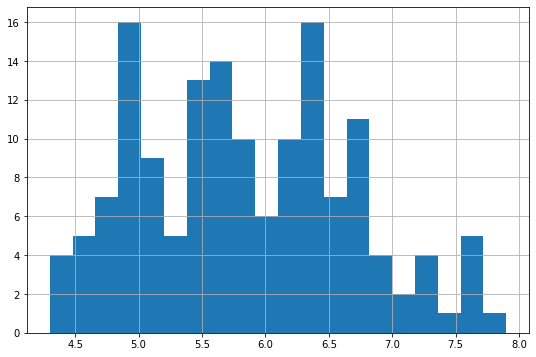

In [22]:
sepal_length = df_iris_from_disk["sepal_l"]
sepal_length.hist(bins=20, figsize=(9,6))

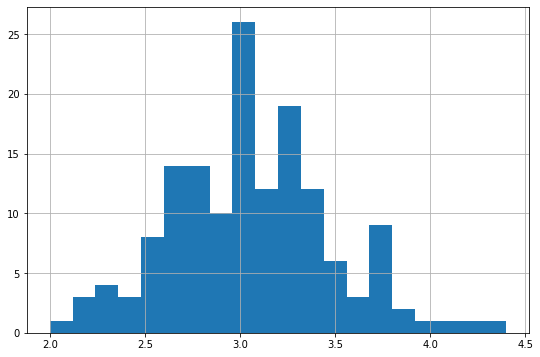

In [23]:
sepal_width = df_iris_from_disk["sepal_w"]
sepal_width.hist(bins=20, figsize=(9,6))

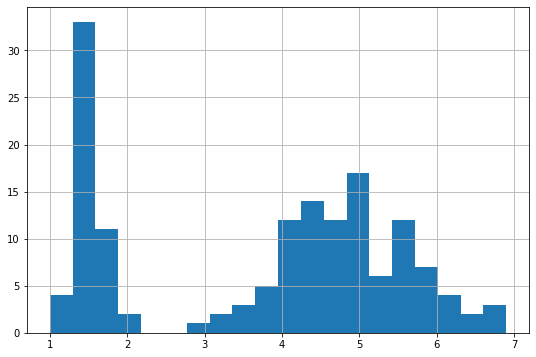

In [24]:
petal_length = df_iris_from_disk["petal_l"]
petal_length.hist(bins=20, figsize=(9,6))

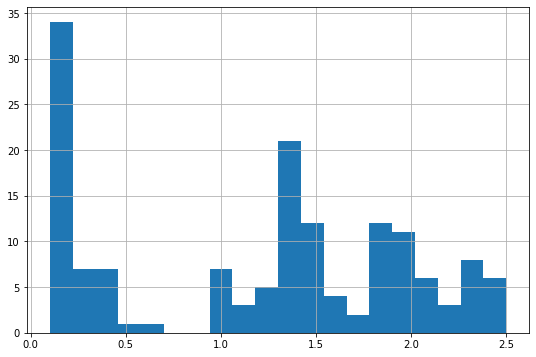

In [25]:
petal_width = df_iris_from_disk["petal_w"]
petal_width.hist(bins=20, figsize=(9,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023B54E49130>,
      dtype=object)

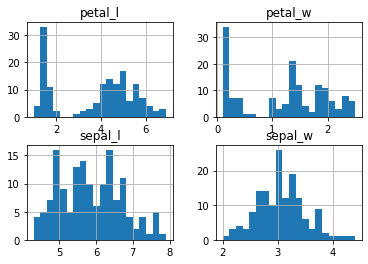

In [26]:
parameters_hist = df_iris_from_disk
parameters_hist.hist(bins=20)

Build the correlation matrix

In [27]:
corr_mat = df_iris_from_disk.corr()
corr_mat

,sepal_l,sepal_w,petal_l,petal_w
sepal_l,1.000000,-0.109369,0.871754,0.817954
sepal_w,-0.109369,1.000000,-0.420516,-0.356544
petal_l,0.871754,-0.420516,1.000000,0.962757
petal_w,0.817954,-0.356544,0.962757,1.000000


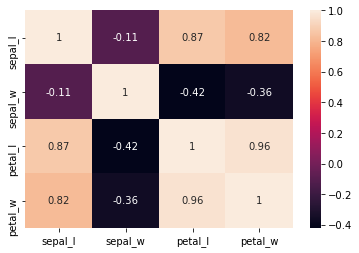

In [28]:
heat_iris = sns.heatmap(corr_mat, annot=True)
heat_iris

Average

In [29]:
average_petal_width = df_iris_from_disk["petal_w"].mean()
average_petal_width
data_above_average_petal_width = iris_data[iris_data["petal_w"] > average_petal_width]
data_above_average_petal_width

average_sepal_length = df_iris_from_disk["sepal_l"].mean()
data_under_sepal_length = iris_data[iris_data["sepal_l"] < average_sepal_length]
data_under_sepal_length

,sepal_l,sepal_w,petal_l,petal_w,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
106,4.9,2.5,4.5,1.7,Iris-virginica
113,5.7,2.5,5.0,2.0,Iris-virginica
114,5.8,2.8,5.1,2.4,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica


In [30]:
iris_versicolor_virginica = iris_data[~iris_data["species"].str.contains("Iris-setosa")]
# Or iris_data[iris_data["species"] != "Iris-setosa"]
iris_versicolor_virginica

,sepal_l,sepal_w,petal_l,petal_w,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Transform species names into IDs

In [31]:
iris_data['flower_name'] = iris_data['species'].str.split('-', expand=True).iloc[:, 1]

# or
# iris_data['flower_name'] = [x[x.find('-')+1:] for x in iris_data['species']]
# iris_data

my_dict = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_data['specie_ID'] = iris_data['species'].apply(lambda x: my_dict[x])

# or
# res = iris_data.replace(to_replace=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], value=[0, 1, 2])
# res.head()

iris_data

,sepal_l,sepal_w,petal_l,petal_w,species,flower_name,specie_ID
0,5.1,3.5,1.4,0.2,Iris-setosa,setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,setosa,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,virginica,2


### Train the classifier

Splitting into train and test (30%)

In [32]:
train, test = train_test_split(iris_data, test_size=0.3, random_state=3)
# Visual checkup
train.shape, test.shape

((105, 7), (45, 7))

In [33]:
# Columns names
train.columns

Index(['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'species', 'flower_name',
       'specie_ID'],
      dtype='object')

In [34]:
# Creating independent variables and target variables
X_train, y_train, X_test, y_test = train[train.columns[:4]], train["species"], test[test.columns[:4]], test["species"]
# Sanity check
assert(len(X_train) == len(y_train))

In [35]:
# Instantiation of the decision tree
clf = tree.DecisionTreeClassifier()

Training of the model

In [36]:
model = clf.fit(X_train, y_train)

Predictions

In [37]:
predictions = model.predict(X_test)
print(predictions)

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica']


In [38]:
y_test.value_counts()
predictions[predictions == 'iris_versicolor'].shape
matrix_conf = confusion_matrix(y_test, predictions)
print(matrix_conf)

[[17  0  0]
 [ 0 11  3]
 [ 0  0 14]]


In [39]:
confusion = pd.DataFrame(matrix_conf, columns=["setosa", "versicolor", "virginica"], index=["setosa", "versicolor", "virginica"])
print(confusion)

            setosa  versicolor  virginica
setosa          17           0          0
versicolor       0          11          3
virginica        0           0         14


Score evaluation

In [41]:
accuracy_score(predictions, y_test)
# OR clf.score(X_test, y_test)

0.9333333333333333